# INT375 PROJECT : Air Quality Dataset Analysis and Visualization

In [19]:
#🔧 Core Libraries
import numpy as np 
import pandas as pd
# 📊 Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 📂 Excel File Handling (if needed)
import openpyxl

### 📥 Load the Dataset

In [20]:
df = pd.read_csv("Air_Quality.csv")
print(df.head(5))

   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     336867           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     336741           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     550157           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     412802           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     412803           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                     Geo Place Name  \
0            CD          407      Flushing and Whitestone (CD7)   
1            CD          107              Upper West Side (CD7)   
2            CD          414  Rockaway and Broad Channel (CD14)   
3            CD          407      Flushing and Whitestone (CD7)   
4            CD          407      Flushing and Whitestone (CD7)   

           Time Period  Start_Date  Data Value  Message  
0       Winter 2014-15  12-01-2014       23.97      NaN  
1       Winter 2014-15  12-01-

### 🧹 Data Cleaning & Preprocessing

In [21]:
cols_to_drop = ['Unique ID', 'Indicator ID', 'Measure Info', 'Message']
df_cleaned = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")
df_cleaned['start_date'] = pd.to_datetime(df_cleaned['start_date'], errors='coerce')
df_cleaned['year'] = df_cleaned['start_date'].dt.year
df_cleaned['month'] = df_cleaned['start_date'].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df_cleaned['season'] = df_cleaned['month'].apply(get_season)
df_cleaned = df_cleaned.drop_duplicates()
print("Cleaned dataset shape:", df_cleaned.shape)
print(df_cleaned.head())

Cleaned dataset shape: (18862, 11)
                     name measure geo_type_name  geo_join_id  \
0  Nitrogen dioxide (NO2)    Mean            CD          407   
1  Nitrogen dioxide (NO2)    Mean            CD          107   
2  Nitrogen dioxide (NO2)    Mean            CD          414   
3  Nitrogen dioxide (NO2)    Mean            CD          407   
4  Nitrogen dioxide (NO2)    Mean            CD          407   

                      geo_place_name          time_period start_date  \
0      Flushing and Whitestone (CD7)       Winter 2014-15 2014-12-01   
1              Upper West Side (CD7)       Winter 2014-15 2014-12-01   
2  Rockaway and Broad Channel (CD14)  Annual Average 2017 2017-01-01   
3      Flushing and Whitestone (CD7)       Winter 2015-16 2015-12-01   
4      Flushing and Whitestone (CD7)          Summer 2016 2016-06-01   

   data_value    year  month  season  
0       23.97  2014.0   12.0  Winter  
1       27.42  2014.0   12.0  Winter  
2       12.55  2017.0    1.0  

### 1. 📊Identify the most frequently recorded air quality indicators to understand data focus.

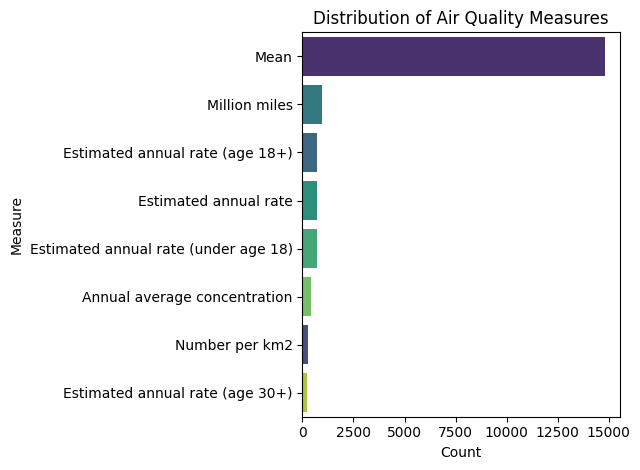

In [22]:
sns.countplot(
    data=df_cleaned,
    y='measure',
    hue='measure',
    order=df_cleaned['measure'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title("Distribution of Air Quality Measures")
plt.xlabel("Count")
plt.ylabel("Measure")
plt.tight_layout()
plt.show()

### 2.📍Top 10 Locations with Highest Number of Air Quality Observations.

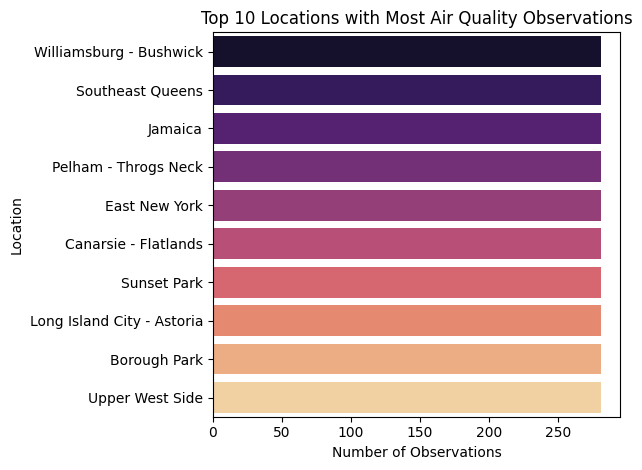

In [35]:
# Top 10 locations with the most observations
top_locations = df['Geo Place Name'].value_counts().nlargest(10)
top_locations_df = pd.DataFrame({'Location': top_locations.index, 'Count': top_locations.values})
# Plot with hue to avoid FutureWarning
sns.barplot(
    data=top_locations_df,
    x='Count',
    y='Location',
    hue='Location',
    palette='magma',
    legend=False
)
plt.title("Top 10 Locations with Most Air Quality Observations")
plt.xlabel("Number of Observations")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

### 3. 📈Trend of Air Quality Indicator Over the Years.

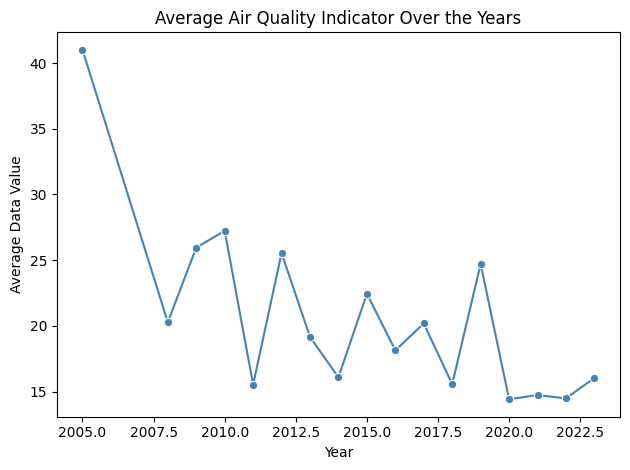

In [56]:
avg_by_year = df_cleaned.groupby('year')['data_value'].mean().reset_index()

sns.lineplot(data=avg_by_year, x='year', y='data_value', marker='o', color='steelblue')
plt.title("Average Air Quality Indicator Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Data Value")
plt.tight_layout()
plt.show()

### 3. 🌦️Evaluate seasonal variations in pollutant levels to detect recurring patterns.

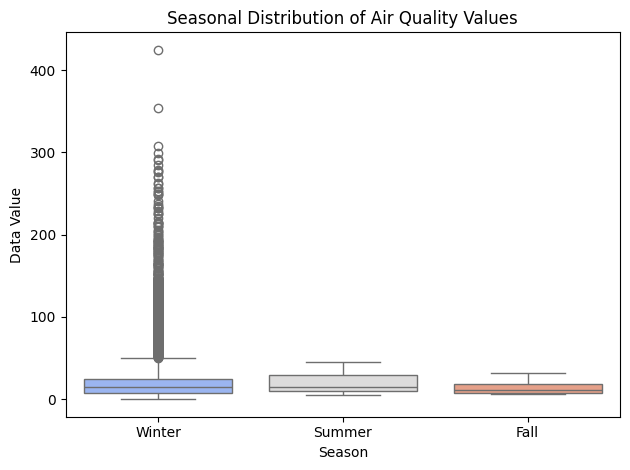

In [36]:
sns.boxplot(
    data=df_cleaned,
    x='season',
    y='data_value',
    hue='season',           
    palette='coolwarm',
    legend=False             
)
plt.title("Seasonal Distribution of Air Quality Values")
plt.xlabel("Season")
plt.ylabel("Data Value")
plt.tight_layout()
plt.show()

### 4. 🏙️Rank community districts based on average pollution levels for targeted intervention.

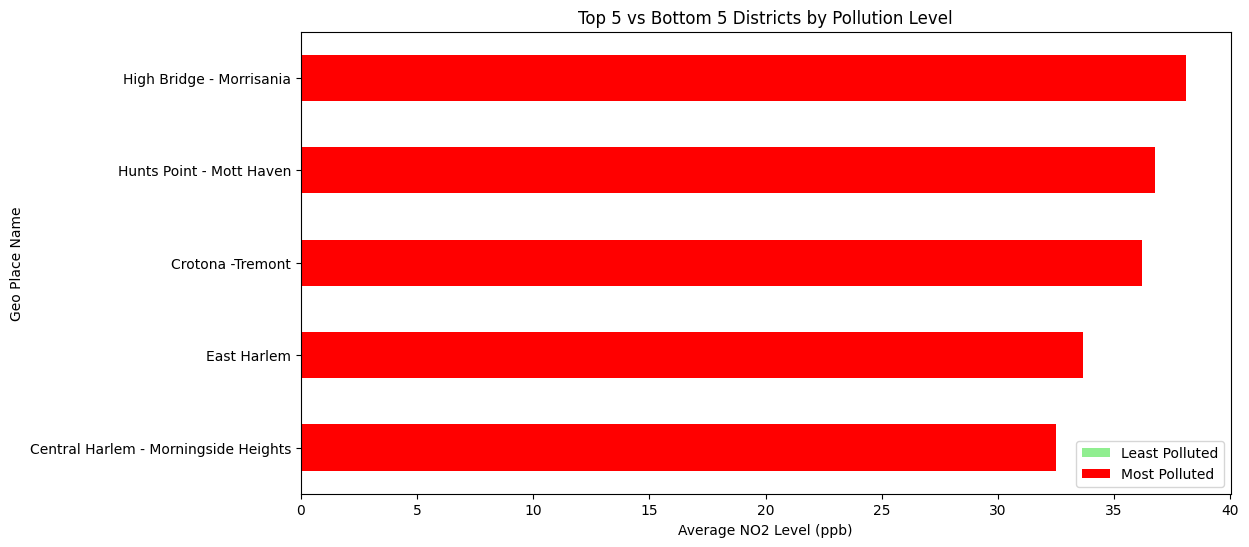

In [26]:
#Top & Bottom Districts by Air Quality
avg_by_place = df.groupby('Geo Place Name')['Data Value'].mean().sort_values()
plt.figure(figsize=(12,6))
avg_by_place.head(5).plot(kind='barh', color='lightgreen', label='Least Polluted')
avg_by_place.tail(5).plot(kind='barh', color='red', label='Most Polluted')
plt.title("Top 5 vs Bottom 5 Districts by Pollution Level")
plt.xlabel("Average NO2 Level (ppb)")
plt.legend()
plt.show()

### 5. 🎯Compare air quality across geographic areas to find regions with high or low pollutant levels.

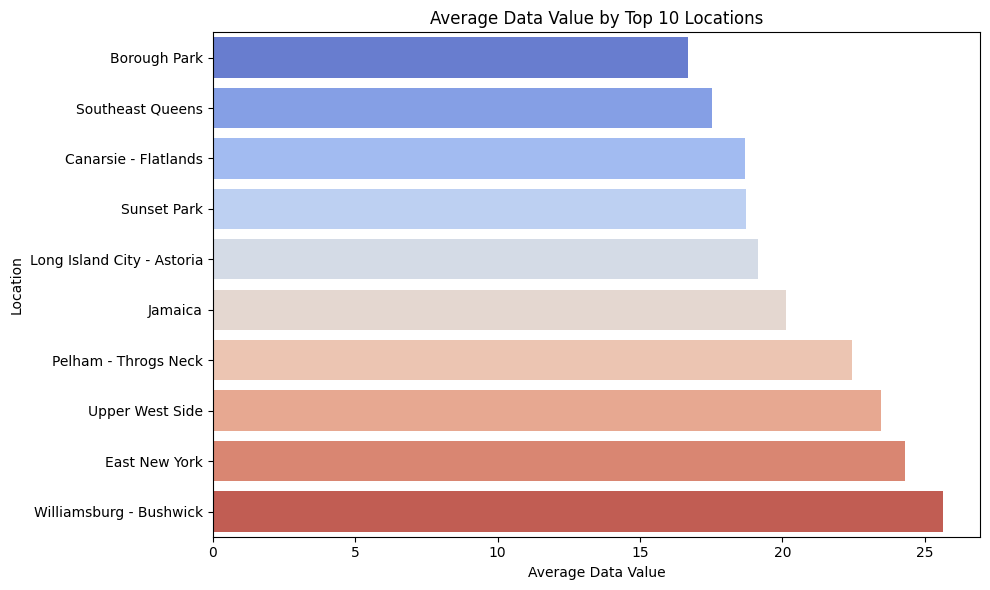

In [37]:
#Average Pollution in Top 10 Locations
top_places = df['Geo Place Name'].value_counts().nlargest(10).index
avg_data = df[df['Geo Place Name'].isin(top_places)].groupby('Geo Place Name')['Data Value'].mean().sort_values()
avg_data_df = pd.DataFrame({'Location': avg_data.index, 'Average Value': avg_data.values})
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_data_df,
    x='Average Value',
    y='Location',
    hue='Location',
    palette='coolwarm',
    legend=False
)
plt.title("Average Data Value by Top 10 Locations")
plt.xlabel("Average Data Value")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

### 6. 🔬Identify trends in air quality over time by analyzing pollutant levels in the most observed city.

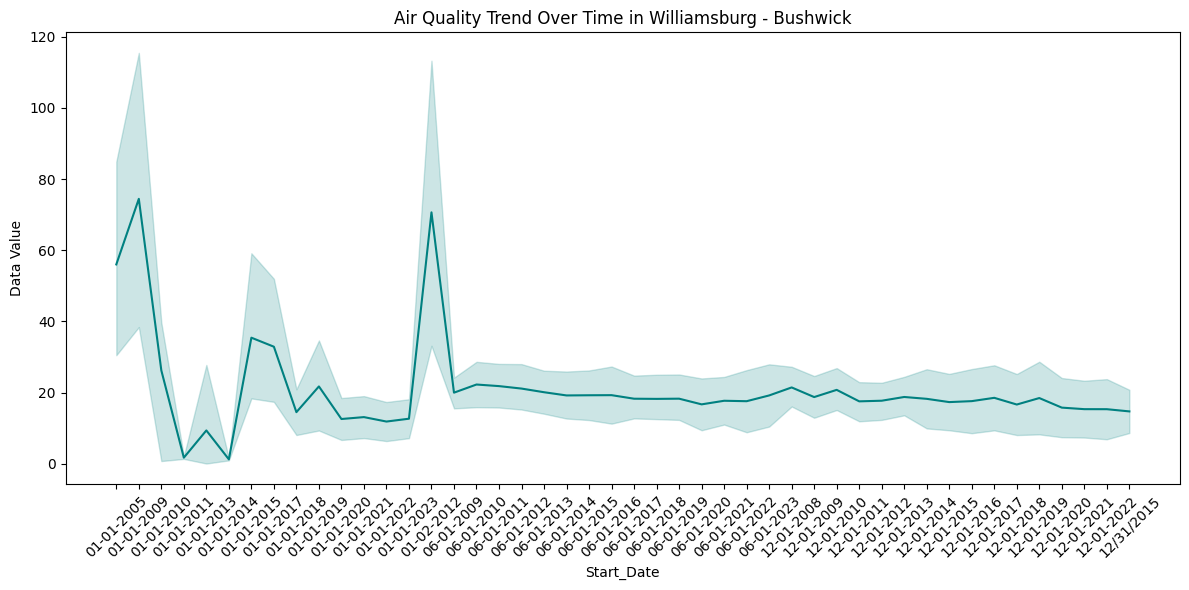

In [50]:
# Air Quality Trend in Top City
top_city = df['Geo Place Name'].value_counts().idxmax()
# Filter and plot
city_data = df[df['Geo Place Name'] == top_city].sort_values(by='Start_Date')
plt.figure(figsize=(12,6))
sns.lineplot(data=city_data, x='Start_Date', y='Data Value', color='teal')  # Change color here
plt.title(f"Air Quality Trend Over Time in {top_city}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. 🌬️Identify Most Frequently Monitored Air Quality Measures

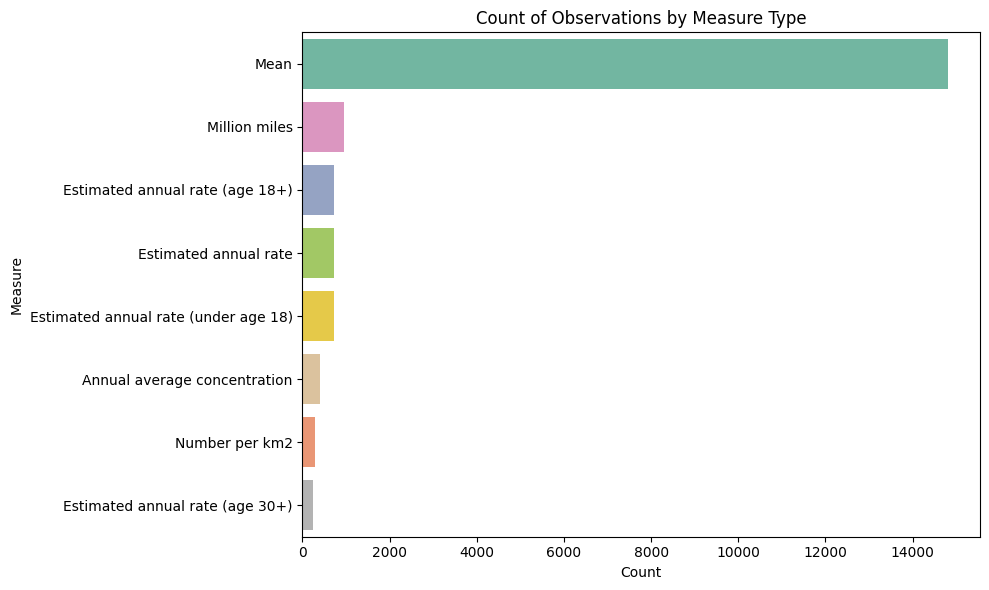

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y='Measure',
    order=df['Measure'].value_counts().index,
    hue='Measure',             # Add hue
    palette='Set2',
    legend=False               # Hide redundant legend
)
plt.title("Count of Observations by Measure Type")
plt.xlabel("Count")
plt.ylabel("Measure")
plt.tight_layout()
plt.show()

### 8. 🌫️ Analyze the Overall Distribution Pattern of Air Quality Measurements

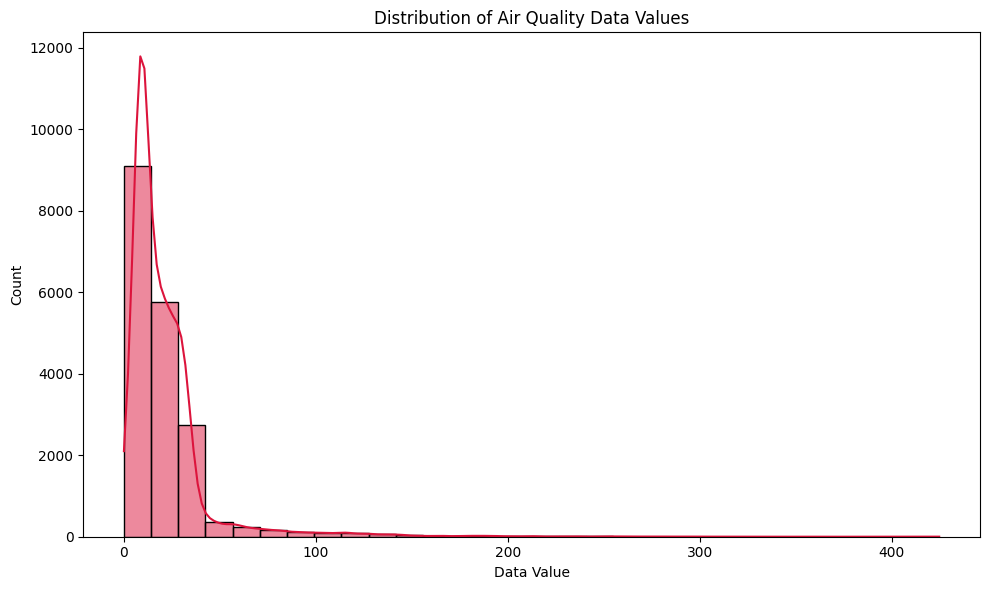

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(df['Data Value'], kde=True, bins=30, color='crimson')
plt.title("Distribution of Air Quality Data Values")
plt.xlabel("Data Value")
plt.tight_layout()
plt.show()

### 9. 🚨Identify and Monitor Unusual Spikes in Pollutant Readings Across Locations

C:\Users\sneha\AppData\Local\Temp\ipykernel_18612\466452185.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


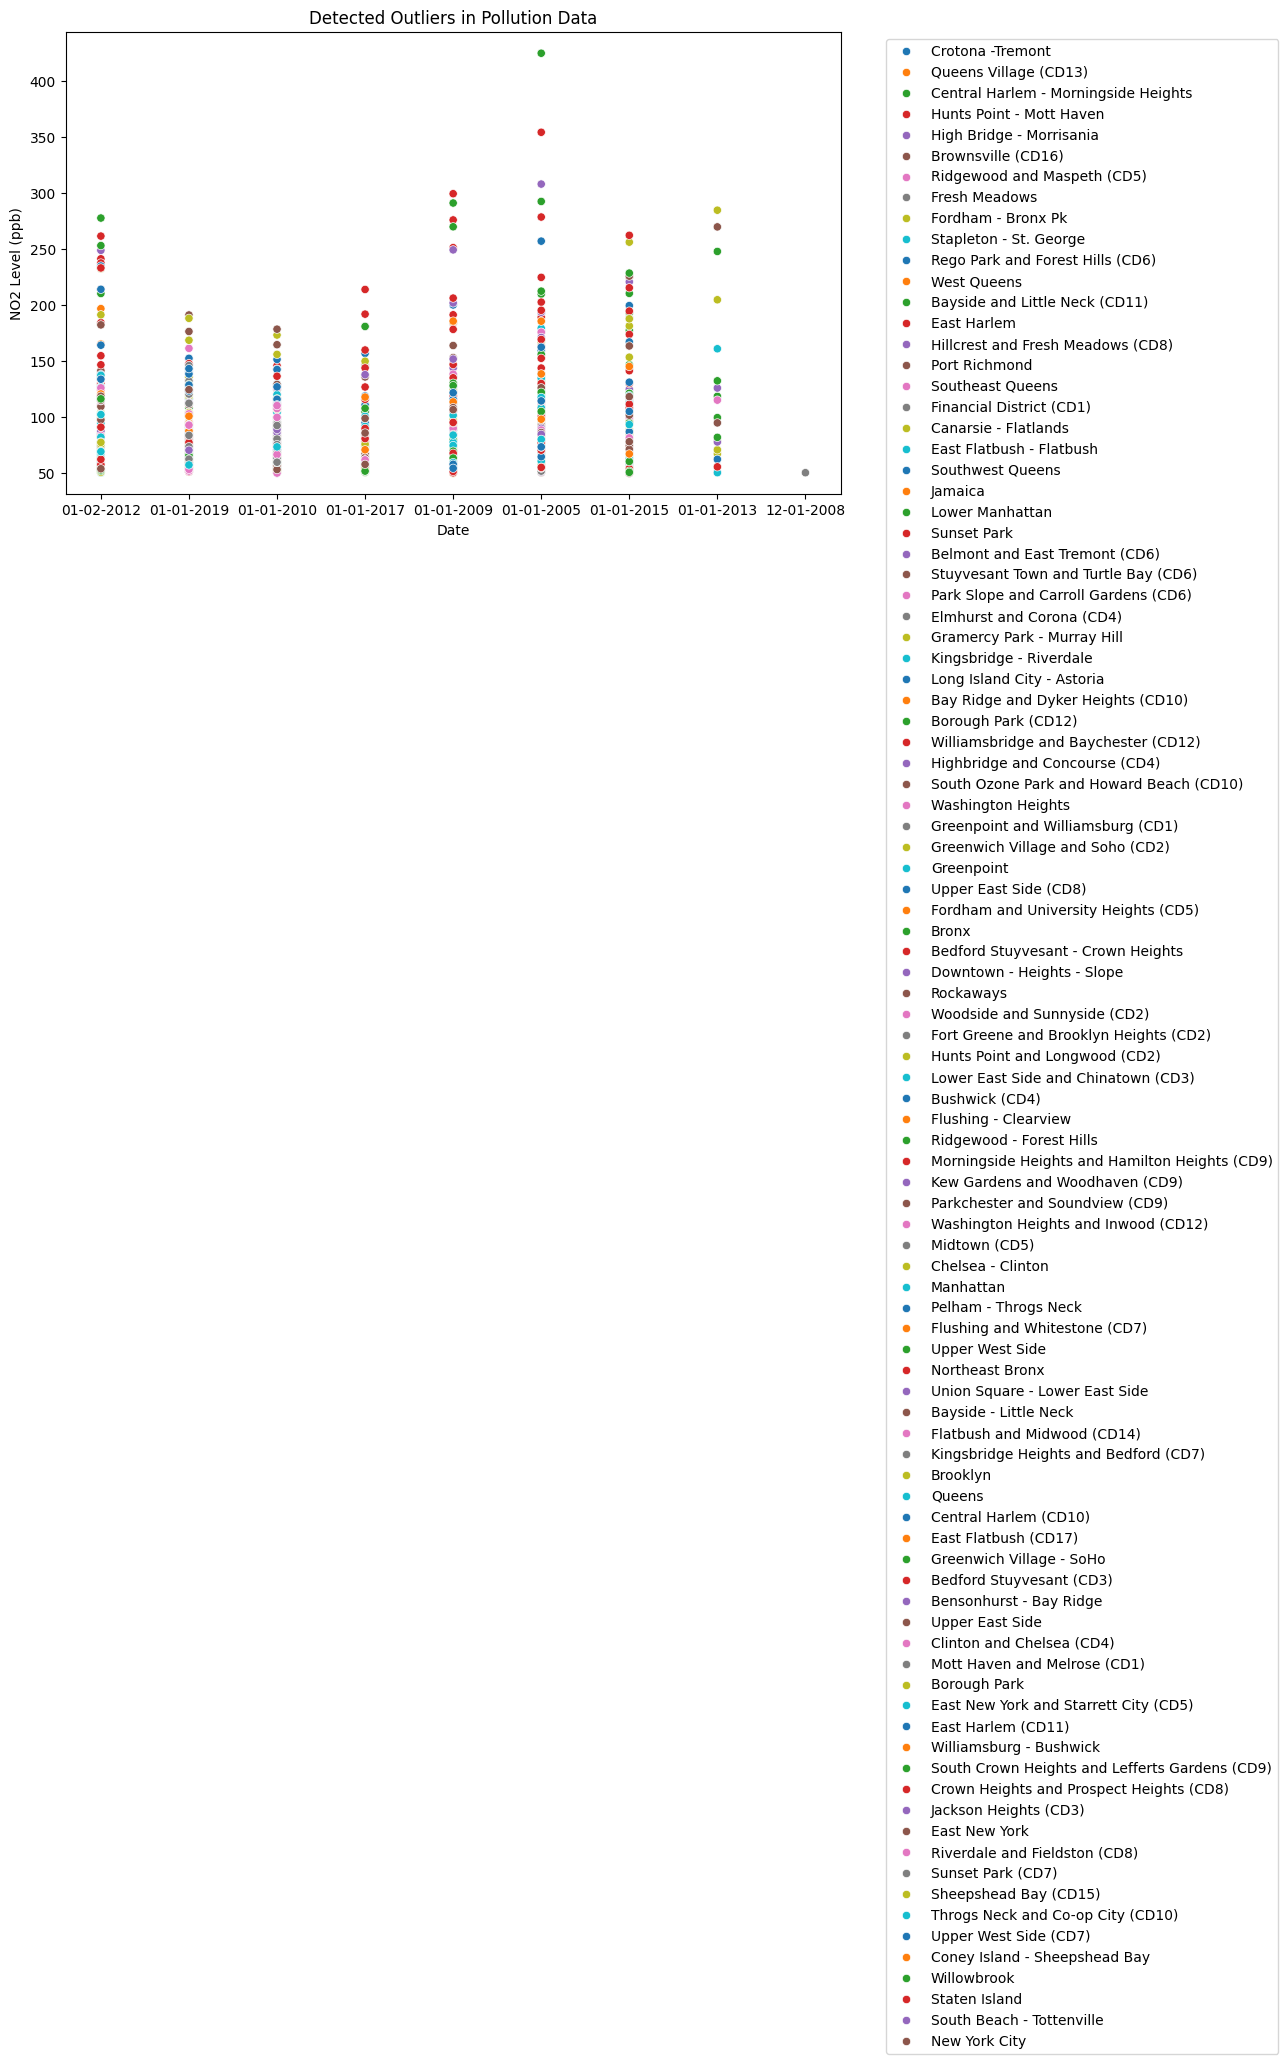

In [57]:
# Detect Outliers in NO₂ Levels Exceeding Safe Thresholds
utliers = df[df['Data Value'] > 50]
plt.figure(figsize=(10,6))
sns.scatterplot(data=outliers, x='Start_Date', y='Data Value', hue='Geo Place Name', palette='tab10')
plt.title("Detected Outliers in Pollution Data")
plt.ylabel("NO2 Level (ppb)")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 10. 📉 To remove outliers in NO₂ levels using the IQR method and visualize the cleaned data with a boxplot.

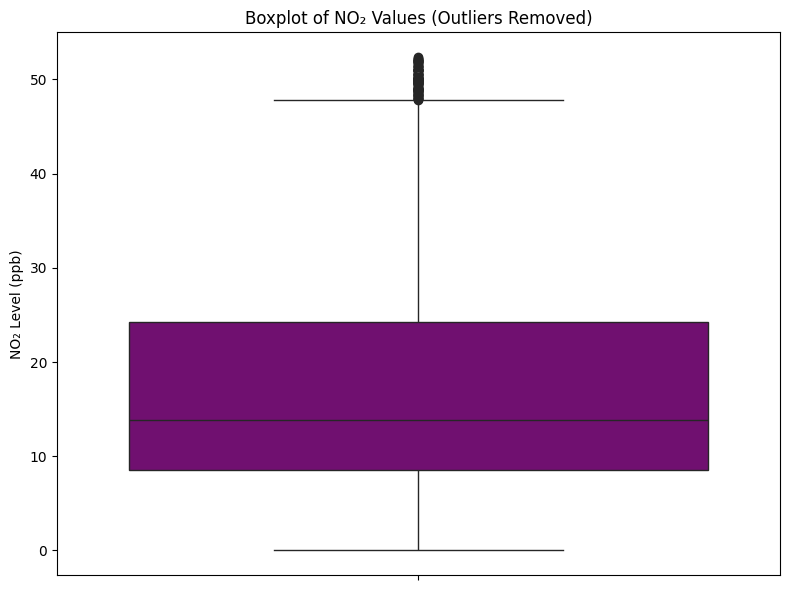

In [53]:
df_no_outliers = df[df['Data Value'] <= 50]
# Calculate IQR
Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df_no_outliers = df[(df['Data Value'] >= lower_bound) & (df['Data Value'] <= upper_bound)]
plt.figure(figsize=(8,6))
sns.boxplot(data=df_no_outliers, y='Data Value', color='purple')
plt.title("Boxplot of NO₂ Values (Outliers Removed)")
plt.ylabel("NO₂ Level (ppb)")
plt.tight_layout()
plt.show()

### 10.🗺️Compare Different Air Quality Measures Across Top Locations

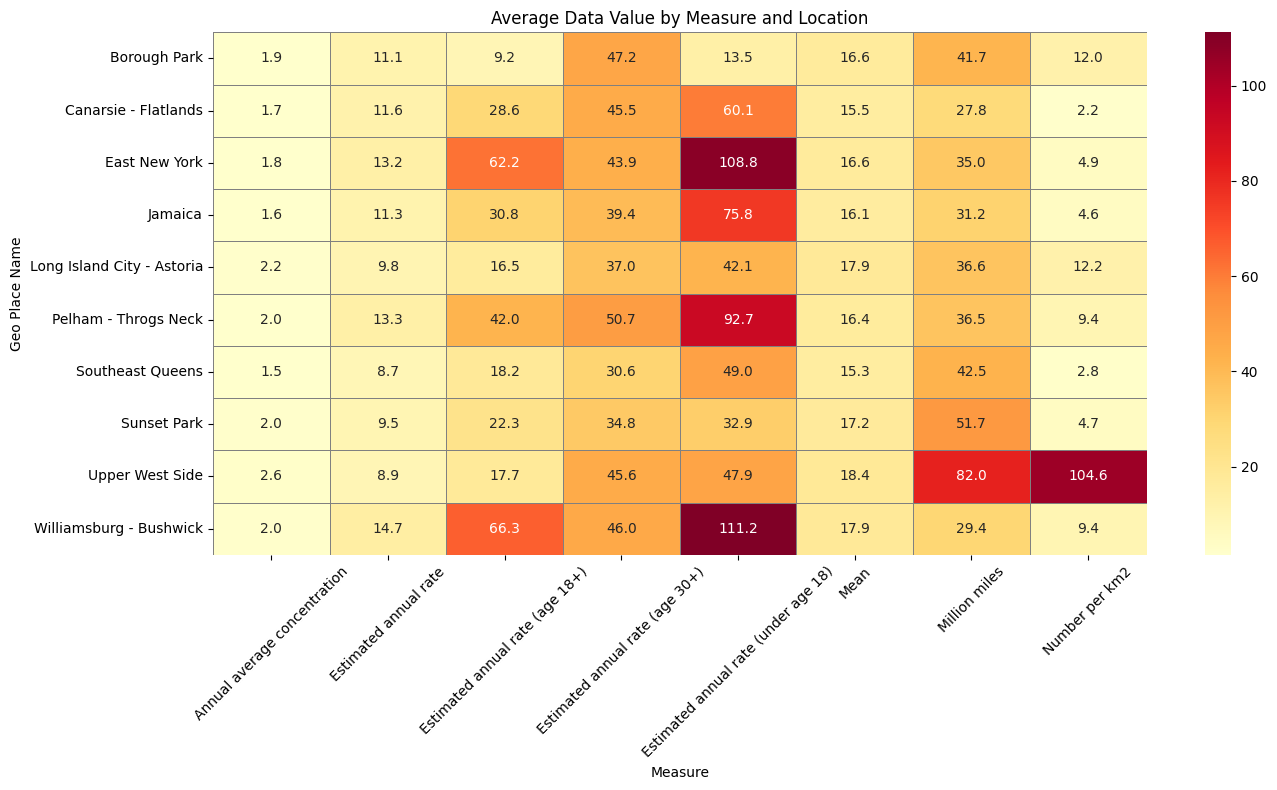

In [33]:
#Heatmap of Harm
# Create pivot table: Rows = Location, Columns = Measure, Values = Average Data Value
pivot_table = df_cleaned.pivot_table(values='data_value', index='geo_place_name', columns='measure', aggfunc='mean')

# Optional: Limit to top 10 most observed locations for readability
top_locations = df_cleaned['geo_place_name'].value_counts().nlargest(10).index
pivot_table_top = pivot_table.loc[pivot_table.index.isin(top_locations)]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_top, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title("Average Data Value by Measure and Location")
plt.xlabel("Measure")
plt.ylabel("Geo Place Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()